## Load Dataset

In [ ]:
# Intstall Panoptic API
!pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-604crz0_
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-604crz0_
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8258 sha256=0be0266951fde4dd5363ab38c37ee3b8fc4c51cf4603935b3b19fca545ce9269
  Stored in directory: /tmp/pip-ephem-wheel-cache-izoybs6k/wheels/70/87/ae/5c2b138c967549070e3fe35f3b5fcaf1ed56e9f5483a09ee65
Successfully built panopticapi


In [ ]:
# Import libraries
import zipfile
import json
import numpy as np
import cv2
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
from panopticapi.utils import rgb2id, IdGenerator
from google.colab.patches import cv2_imshow

In [ ]:
# Download Dataset
!curl -O http://images.cocodataset.org/zips/train2017.zip
!curl -O http://images.cocodataset.org/zips/val2017.zip
!curl -O http://images.cocodataset.org/zips/test2017.zip
!curl -O http://images.cocodataset.org/annotations/panoptic_annotations_trainval2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.0G  100 18.0G    0     0  18.8M      0  0:16:18  0:16:18 --:--:-- 20.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  17.7M      0  0:00:43  0:00:43 --:--:-- 18.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6339M  100 6339M    0     0  9454k      0  0:11:26  0:11:26 --:--:-- 8933k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  820M  100  820M    0     0  9154k      0  0:01:31  0:01:31 --:--:-- 14.3M


In [ ]:
# Extract image and annotation files
def unzip(filePath, extractPath):
  with zipfile.ZipFile(filePath, 'r') as zip_ref:
      zip_ref.extractall(extractPath)
unzip('train2017.zip', './coco/images')
unzip('val2017.zip', './coco/images')
unzip('test2017.zip', './coco/images')
unzip('panoptic_annotations_trainval2017.zip', './coco')
unzip('./coco/annotations/panoptic_val2017.zip', './coco/annotations')
unzip('./coco/annotations/panoptic_train2017.zip', './coco/annotations')

## Explore Dataset

In [ ]:
with open('coco/annotations/panoptic_train2017.json', 'r') as f:
       coco_train_ann = json.load(f)
with open('coco/annotations/panoptic_val2017.json', 'r') as f:
       coco_val_ann = json.load(f)

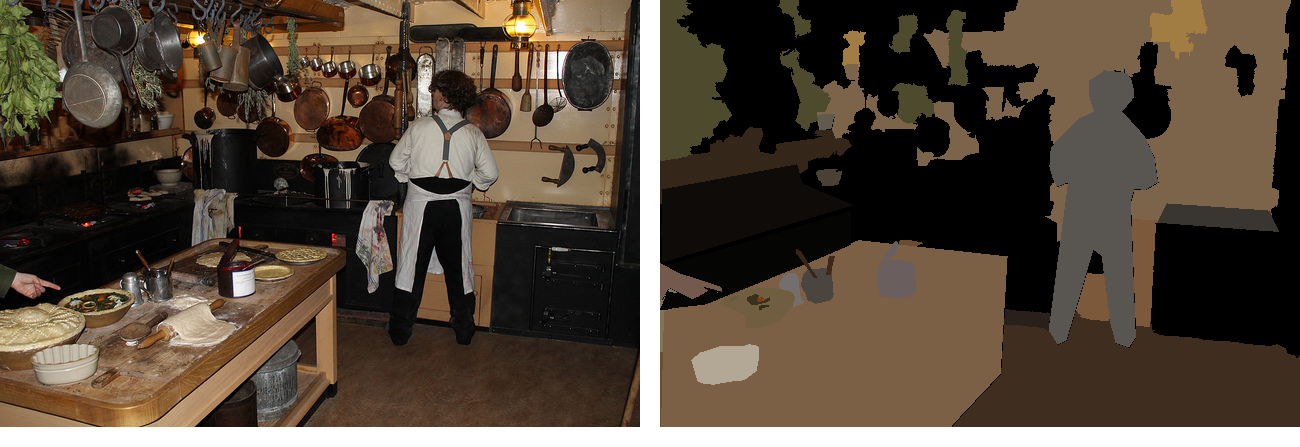

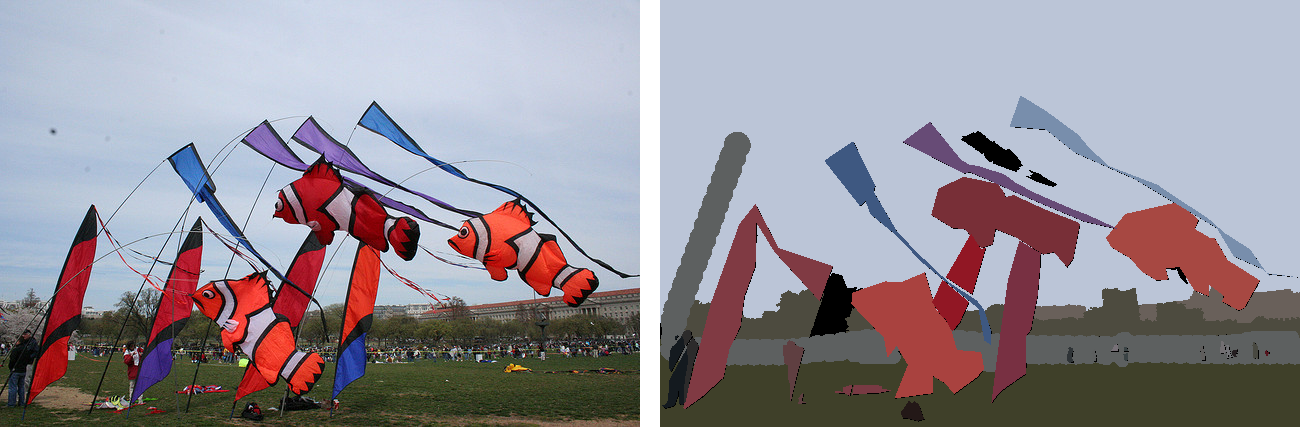

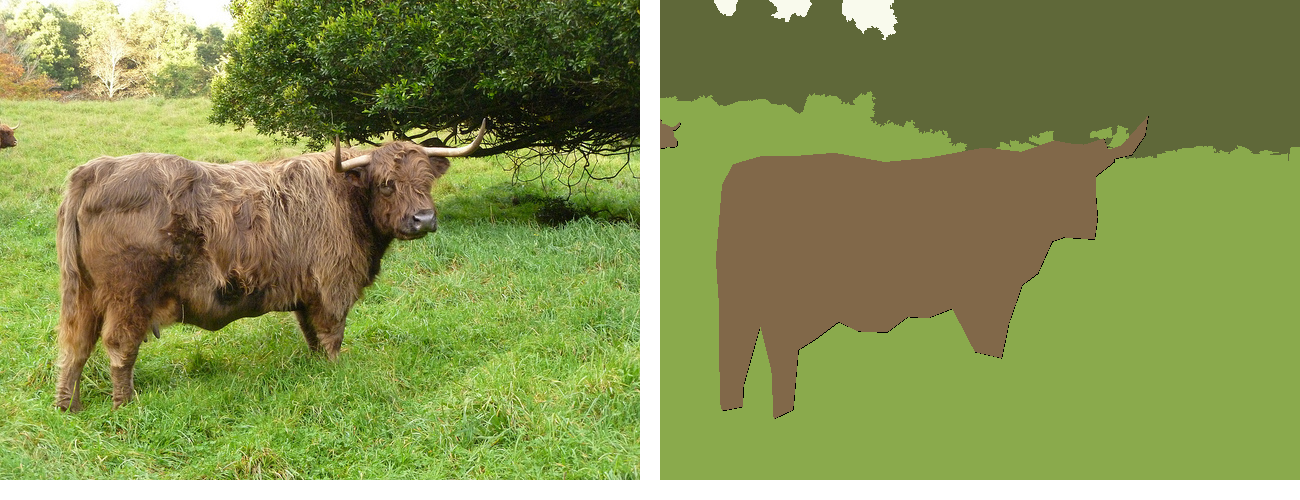

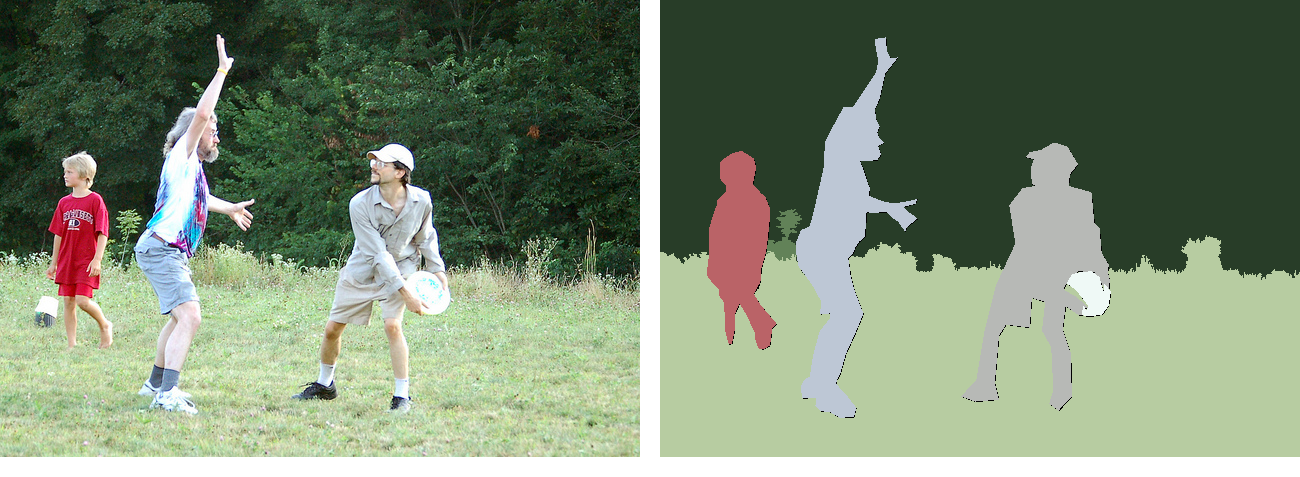

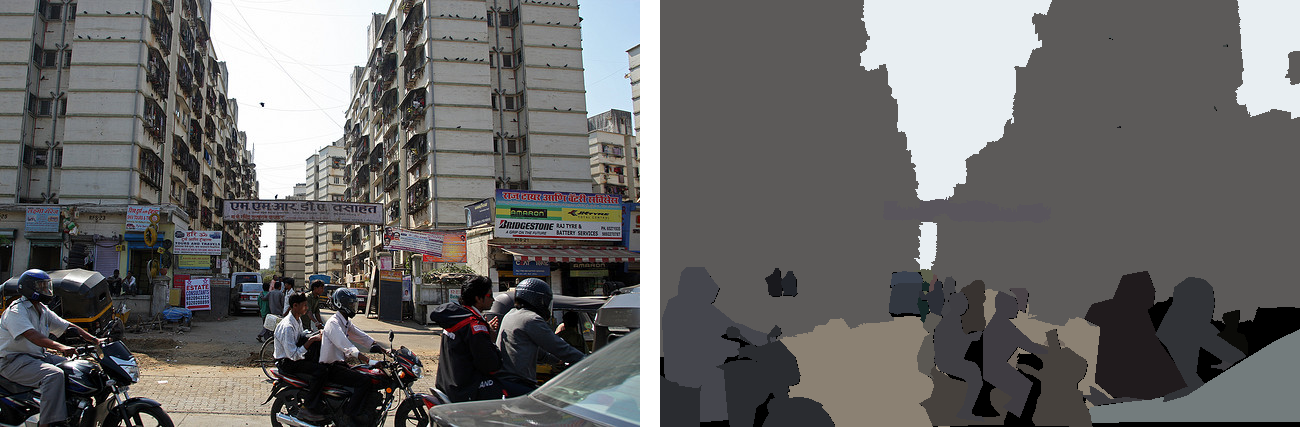

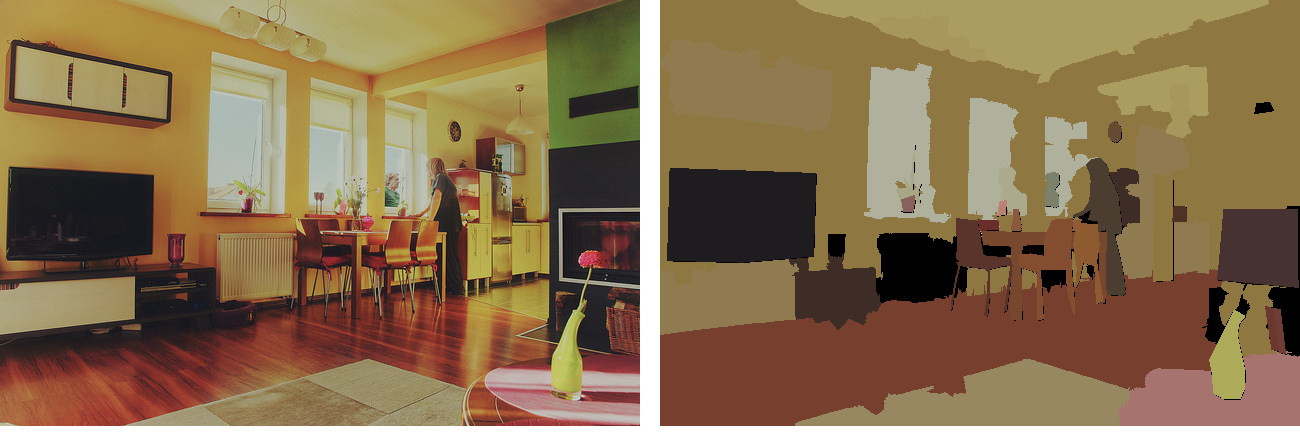

In [91]:
# Visualize Examples
def visualize_example(image_id):
  image_info = [img for img in coco_val_ann['images'] if img['id'] == image_id][0]
  panoptic_ann = [ann for ann in coco_val_ann['annotations'] if ann['image_id'] == image_id][0]

  # Load the image
  image_info_path = 'coco/images/val2017/' + image_info['file_name']
  image_panoptic_path = 'coco/annotations/panoptic_val2017/' + panoptic_ann['file_name']

  # Visualize the image and segmentation
  img_info = cv2.imread(image_info_path)
  img_panoptic = cv2.imread(image_panoptic_path)
  spacer = np.ones((img_info.shape[0], 20, 3), dtype=np.uint8) * 255 # white space

  # Concatenate the images horizontally
  combined_image = cv2.hconcat([img_info, spacer, img_panoptic])
  combined_image = np.vstack((combined_image, np.ones((20, combined_image.shape[1], 3), dtype=np.uint8) * 255)) # white space below

  # Display the combined image
  cv2_imshow(combined_image)

# Visualize some sample images and segmentations
visualize_example(397133)
visualize_example(17959)
visualize_example(518213)
visualize_example(442836)
visualize_example(296649)
visualize_example(139)

Total supercategories: 27


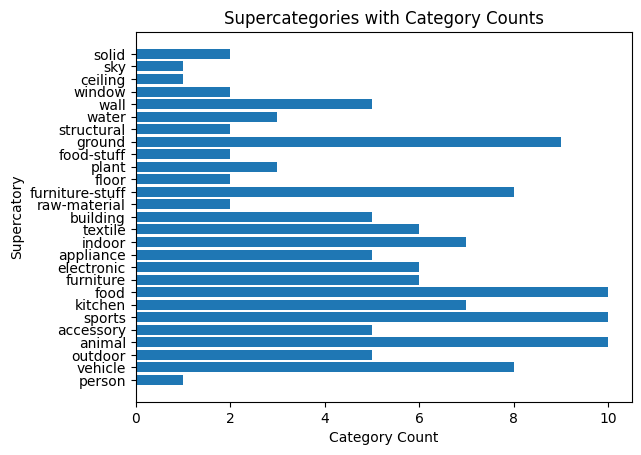

In [88]:
# Plot Supercategories with Category Counts
supercategories = [category['supercategory'] for category in coco_train_ann['categories']]
supercategories_counts = Counter(supercategories)
print('Total supercategories:', len(supercategories_counts))
plt.title('Supercategories with Category Counts')
plt.xlabel('Category Count')
plt.ylabel('Supercatory')
plt.barh(list(supercategories_counts.keys()), supercategories_counts.values())
plt.show()

## Model Training

In [ ]:
# Detectron2: A popular choice for panoptic segmentation, offering multiple pre-trained models and easy integration with COCO.
# mmdetection: Another powerful library with support for panoptic segmentation and COCO.

## Model Evaluation

In [89]:
# https://cocodataset.org/#panoptic-eval
# import json
# from panopticapi.evaluation import pq_compute

# # ... (Load your predictions in the same format as the COCO annotations)

# # Load ground truth and prediction JSON files
# with open("path/to/ground_truth.json") as f:
#     gt_json = json.load(f)

# with open("path/to/predictions.json") as f:
#     pred_json = json.load(f)

# # Evaluate
# pq_compute(gt_json, pred_json)